In [2]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as urlr
import scipy.optimize as opt
from scipy.signal import savgol_filter
from numpy.fft import fft, fftfreq, fftshift

In [3]:
plt.style.use("seaborn")
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.figsize"] = (5*16/3, 8)

In [4]:
m, Vin = np.genfromtxt("calibration.txt", unpack=True)

In [5]:
def f(t, a, b, c):
    return a*np.exp(-b*t)

D:\ProgramData\Anaconda3\envs\compsense\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


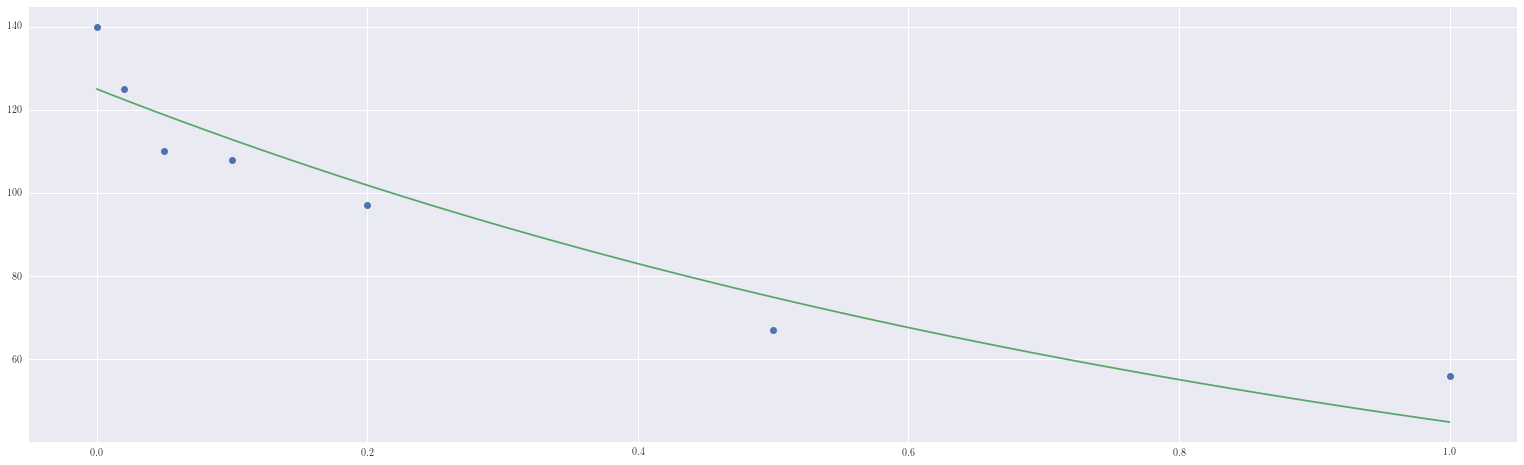

In [6]:
popt, pcov = opt.curve_fit(f, m/1e3, Vin)
x = np.linspace(m.min(), m.max()) / 1e3

plt.plot(m/1e3, Vin, "o")
plt.plot(x, f(x, *popt))
plt.show()


In [12]:
def characterization(filename, width, polyorder):
    t, motion = np.genfromtxt(filename, skip_header=2, delimiter=",").T
    t -= t.min()
    t = t/1000
    lim = 50
    yfilt = savgol_filter(motion, width, polyorder)
    plt.subplot(121)
    plt.plot(t, motion, 'r--', alpha = 0.25)
    plt.plot(t, yfilt, 'k-', lw = 2)

    plt.subplot(122)
    out = np.abs(fft(yfilt))
    freq = np.abs(np.fft.fftfreq(t.shape[-1]))*100
    plt.plot(freq[1:lim],out[1:lim], 'b--')
    plt.plot(freq[1:lim],out[1:lim], 'ro', ms = 10)
    plt.show()

In [1]:
fft.fftfreq?

Object `fft.fftfreq` not found.


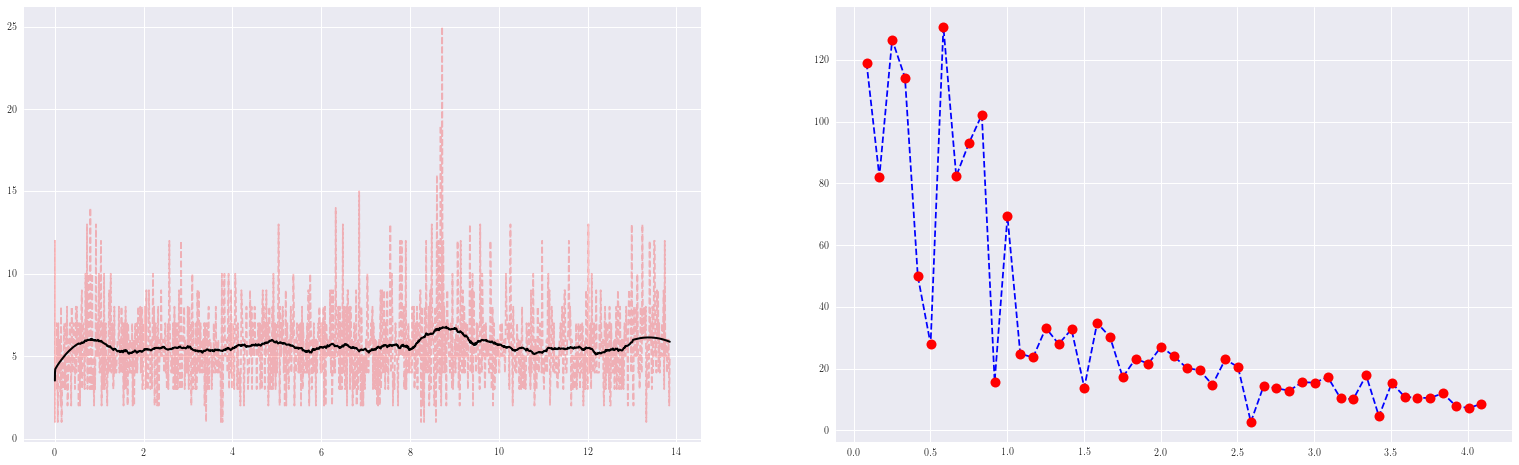

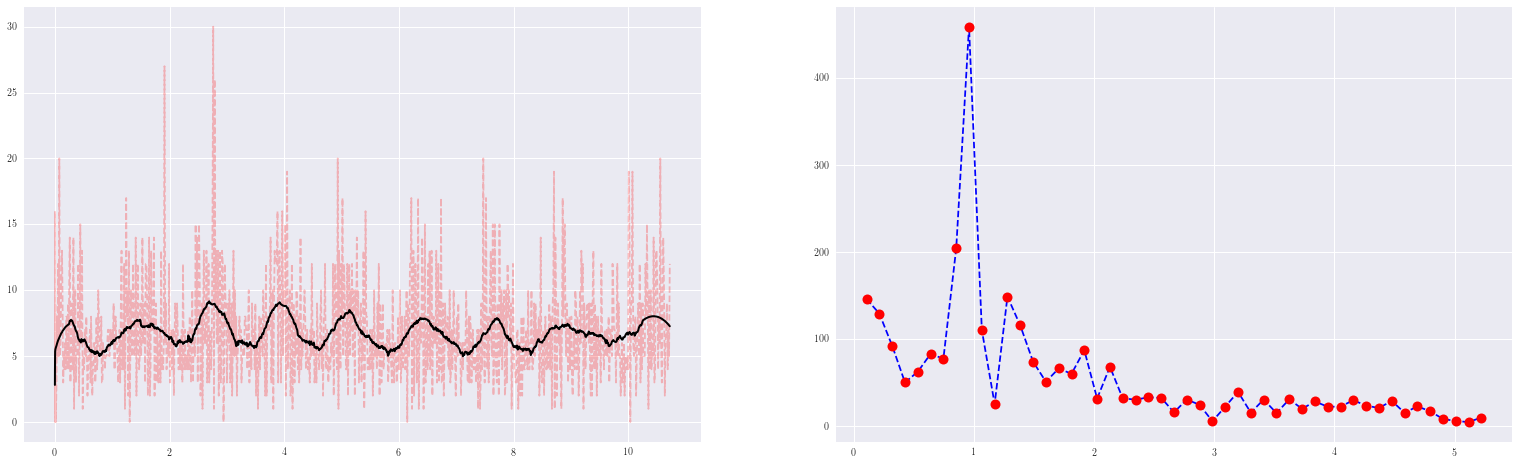

In [13]:
characterization("standing1.log", 131, 2)
characterization("walking1.log", 71, 2)


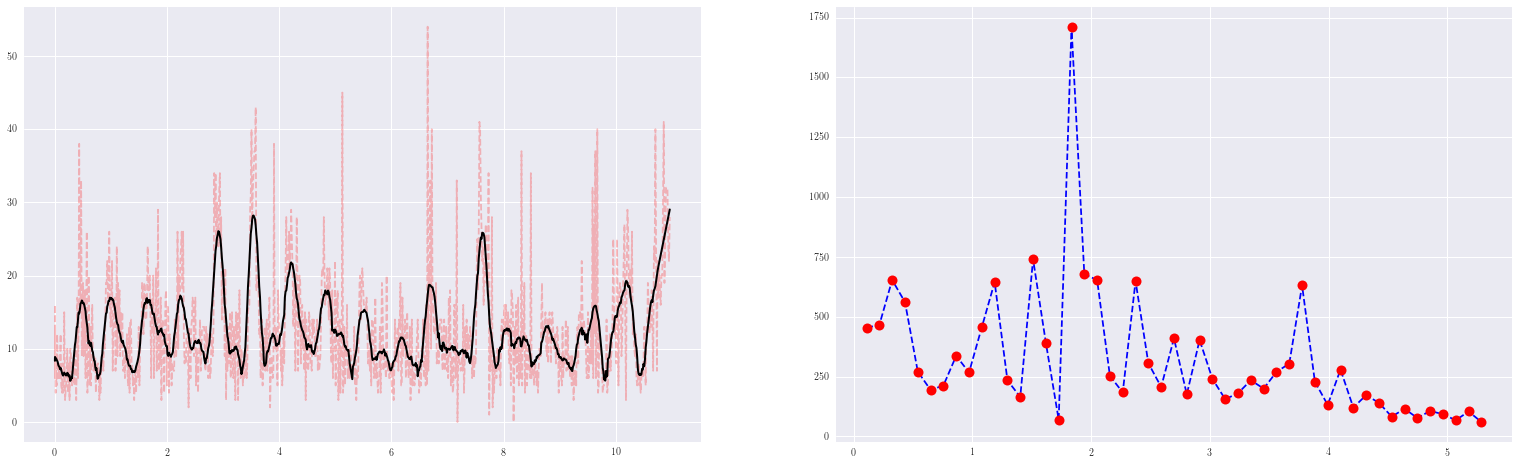

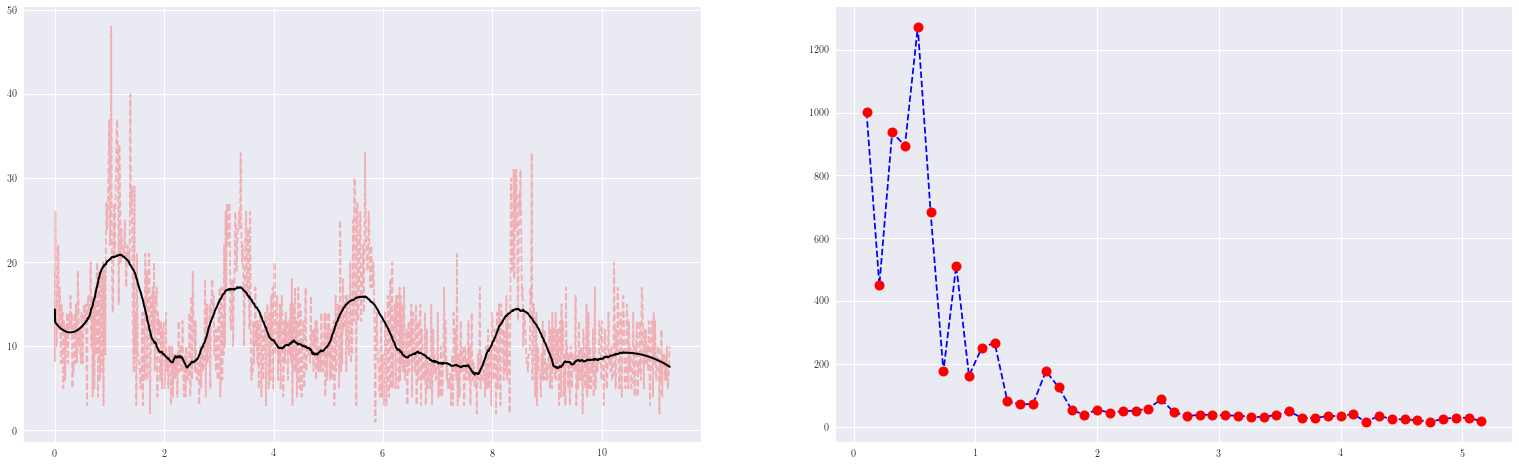

In [253]:
characterization("running1.txt", 31, 2)
characterization("jumping1.txt", 131, 2)

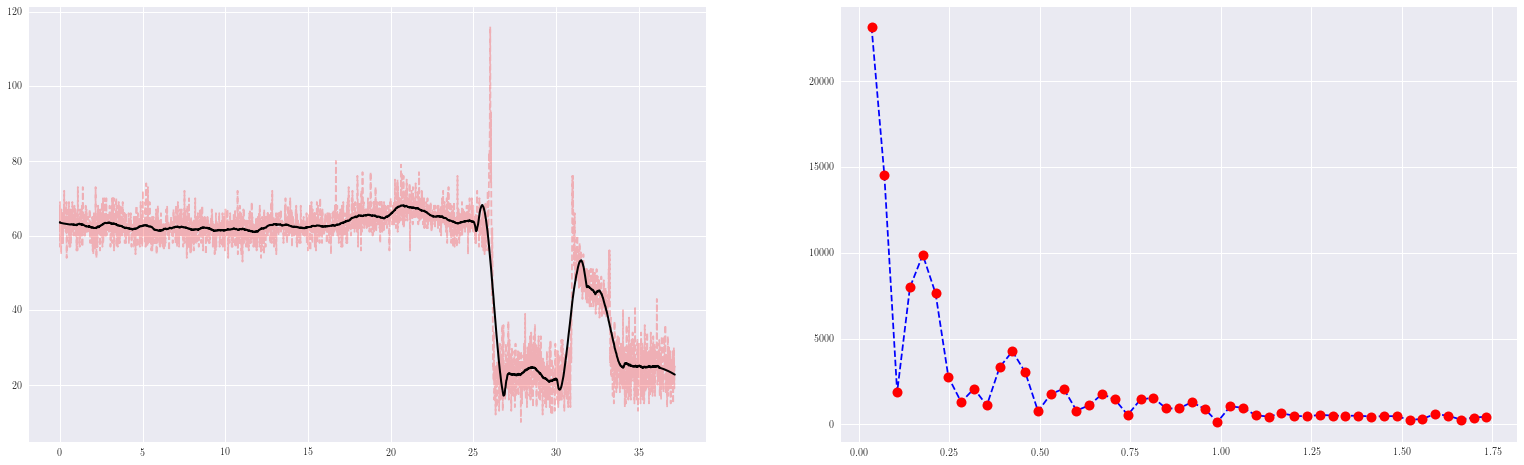

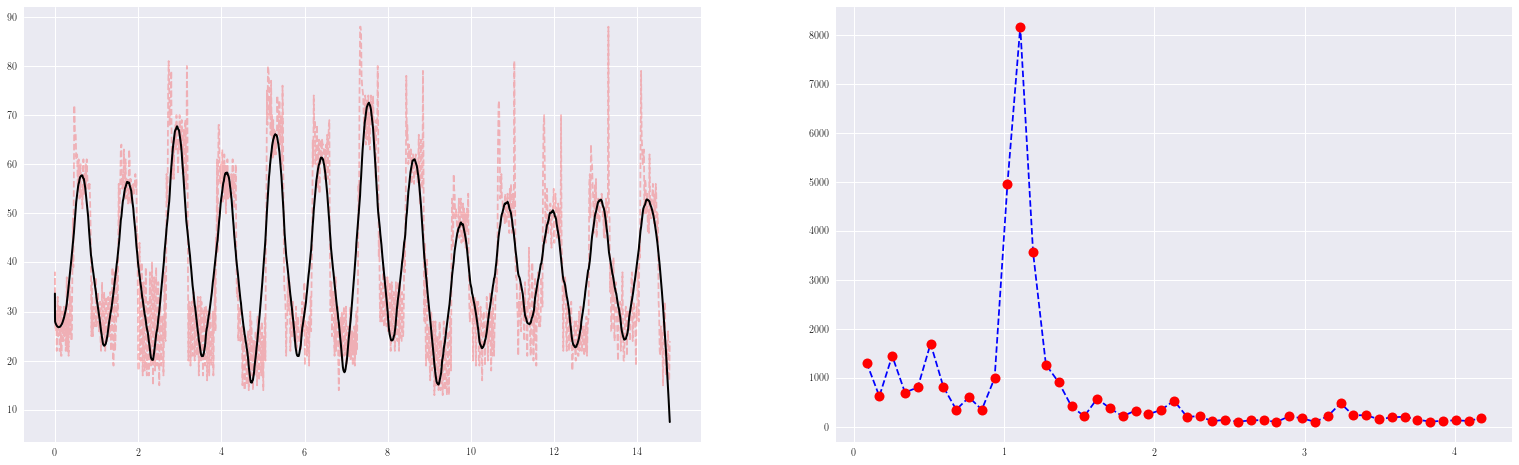

In [18]:
characterization("standing.log", 131, 2)
characterization("walking.log", 71, 2)


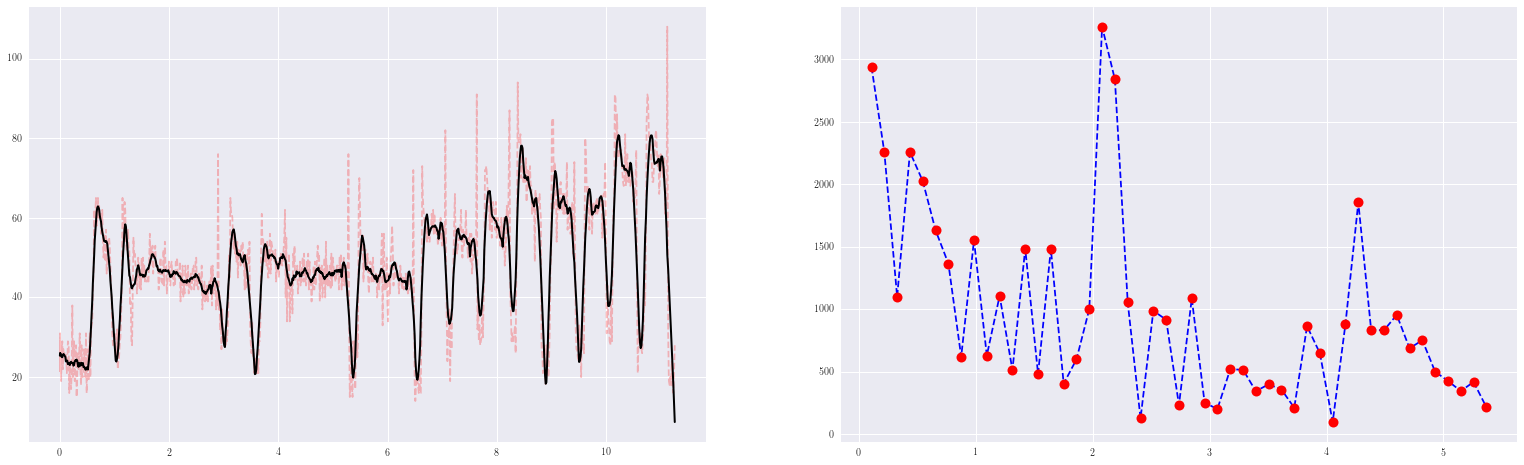

In [255]:
characterization("running.txt", 21, 2)

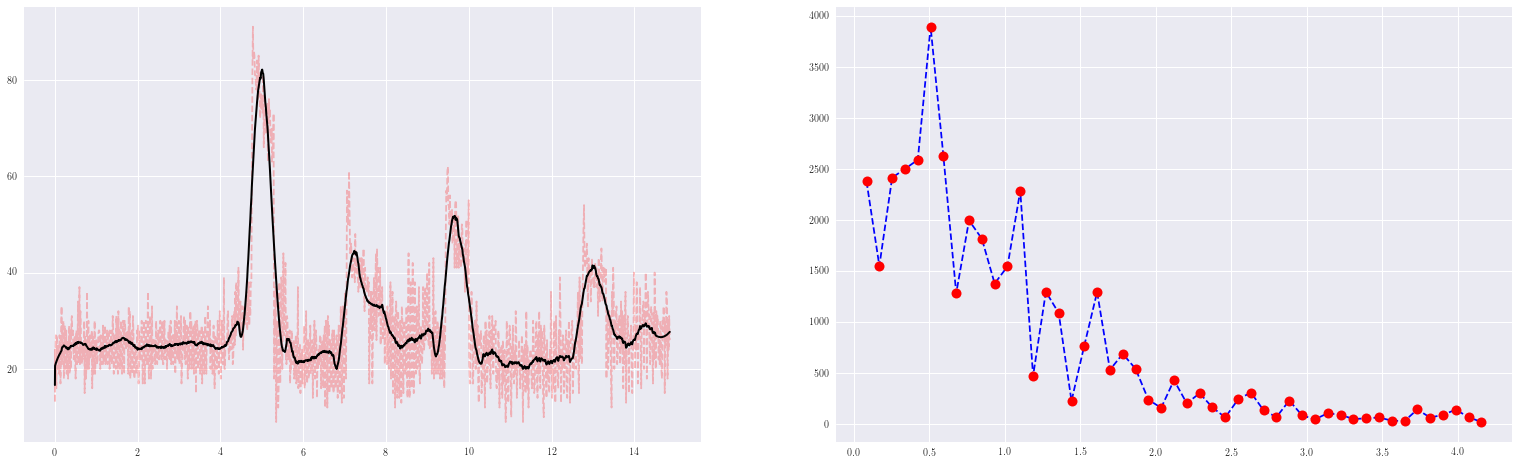

In [256]:
characterization("jumping.txt", 51, 2)

In [238]:
t, motion = np.genfromtxt('walking1.txt', skip_header=2, delimiter=",").T

In [239]:
t -= t.min()
t = t/1000
t.max()

10.723

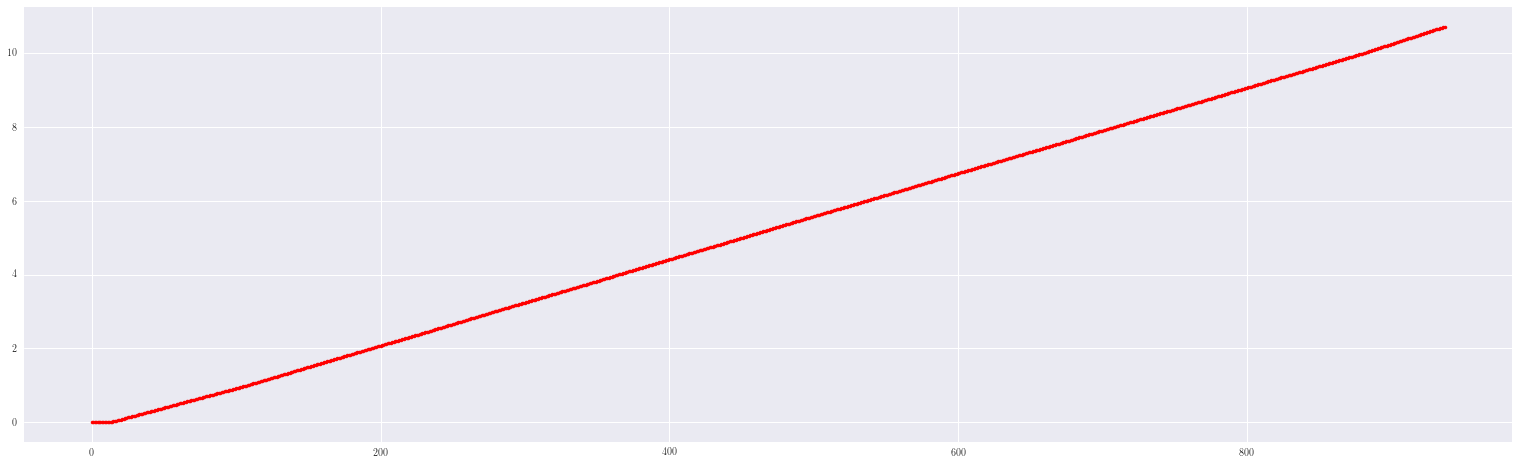

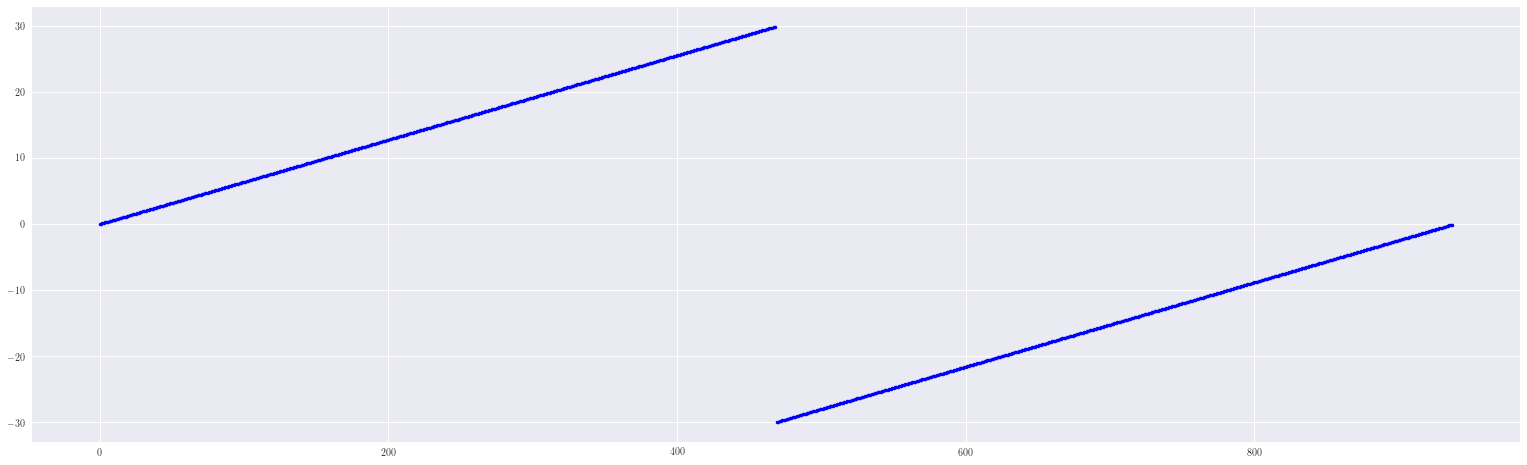

In [243]:
freq = (np.fft.fftfreq(t.shape[-1]))*60
plt.plot(t, 'r.')
plt.show()
plt.plot(freq, 'b.')
plt.show()

In [234]:
help(fft.fftfreq)

AttributeError: 'function' object has no attribute 'fftfreq'